In [1]:
# Import
import sys

sys.path.append("../src")
from common import (
    load_config,
    setup_or_load_project, 
    iterate_experiments_filt,
    create_folders,
    def_folders)
from signal_converter import (
    load_processed_log,
    process_mouse_experiment)

In [2]:
# Change the path here
config_path=r"D:\Analysis_test\config.yaml"

Log file not found at D:\Analysis_test\Main_analysis_2025-07-20\Info\processed_log.csv. Creating a new one.
Processing experiment day: Example
Found: exp=Example, mouse=m4433, state=Awake, protocol=RV-pulse09
[DEBUG] Processing: m4433 / Example / RV-pulse09 / Awake
[PROCESSING] Alignment: m4433, Example, RV-pulse09, Awake


fluo images [m4433]: 100%|███████████████████████████████████████████████████████| 8800/8800 [00:01<00:00, 8585.89it/s]


(64, 87)


refl2 images [m4433]: 100%|██████████████████████████████████████████████████████| 4400/4400 [00:00<00:00, 8570.30it/s]


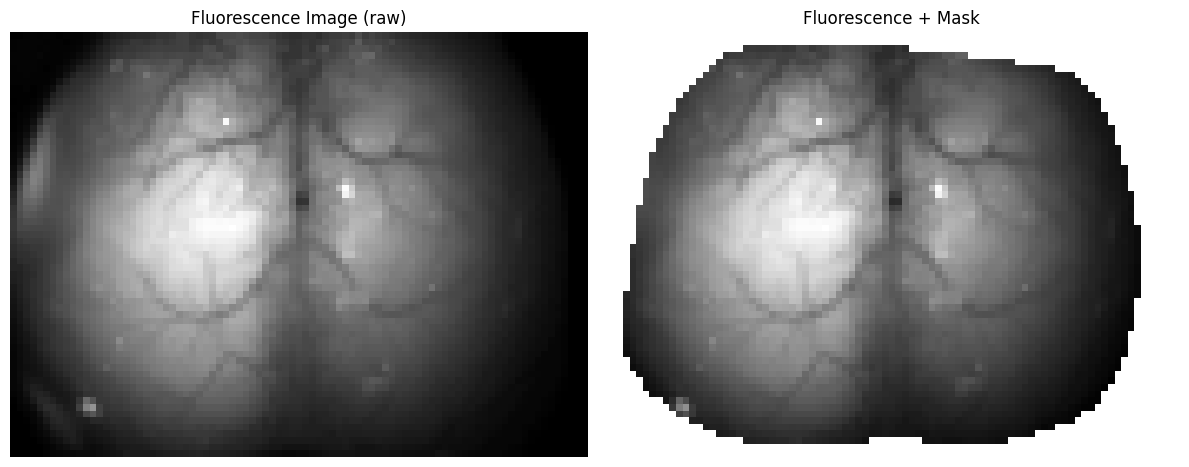

[DEBUG] Starting GCaMP conversion for m4433 / Example


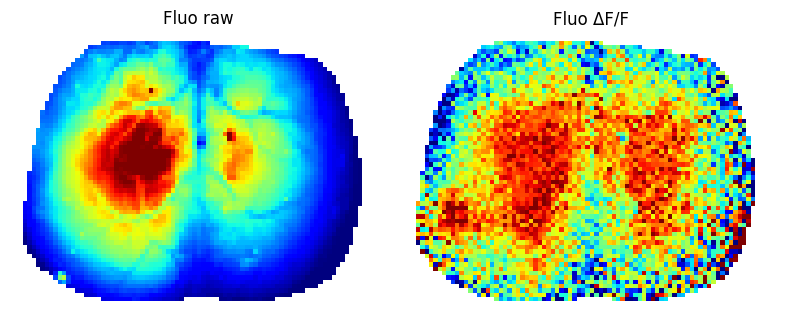

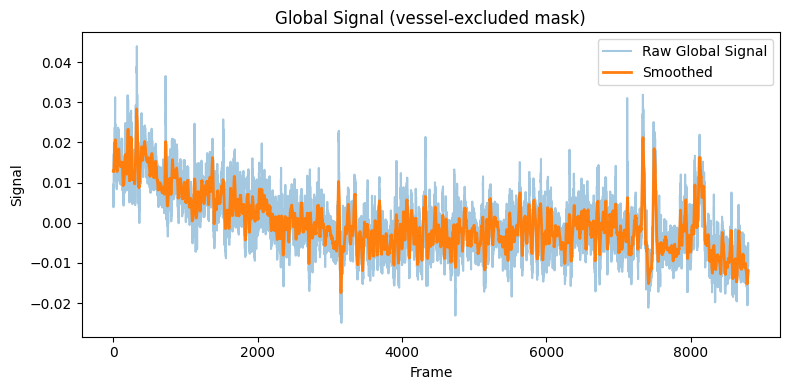

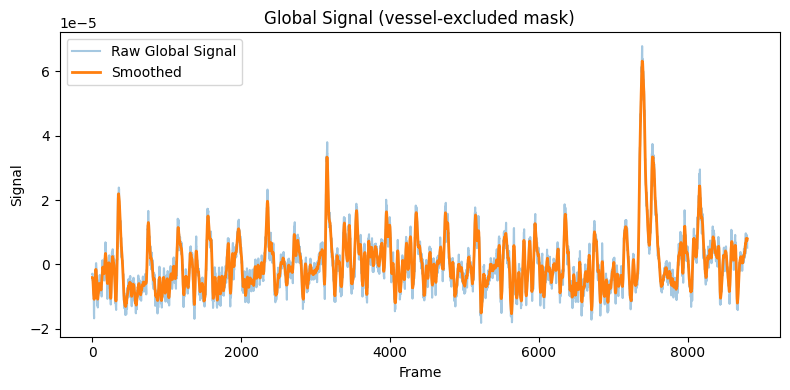

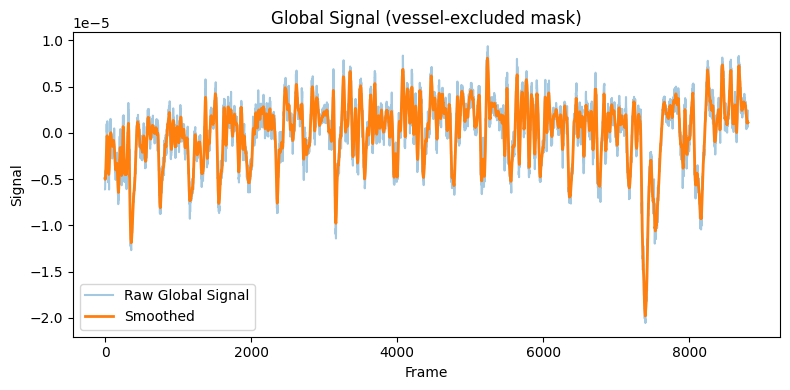

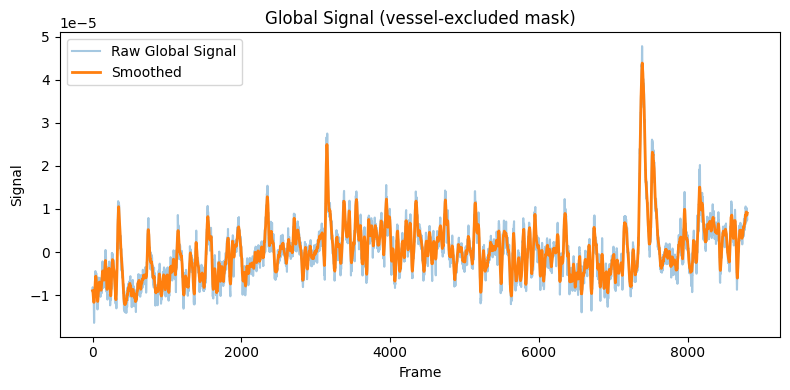

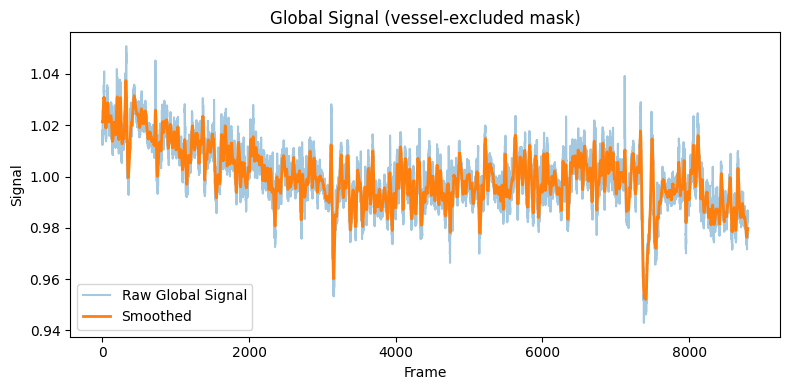

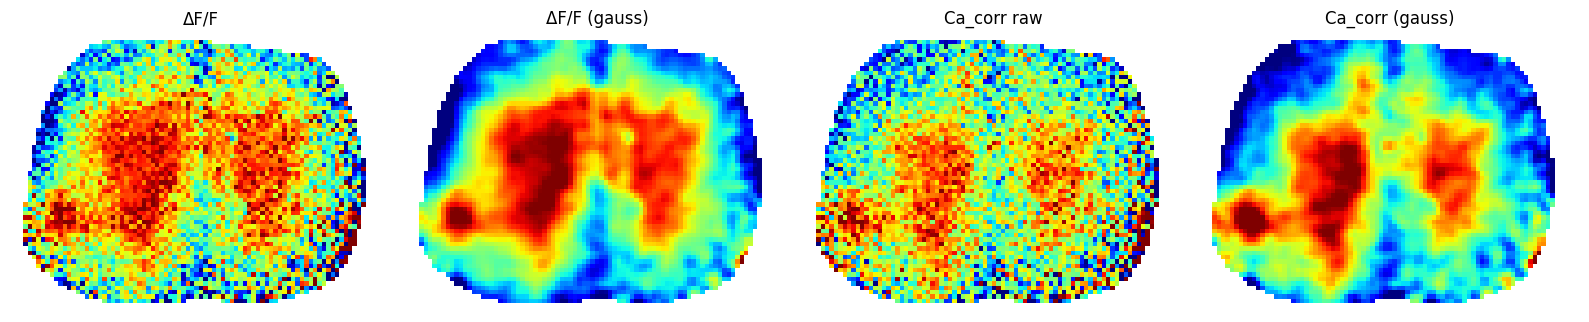

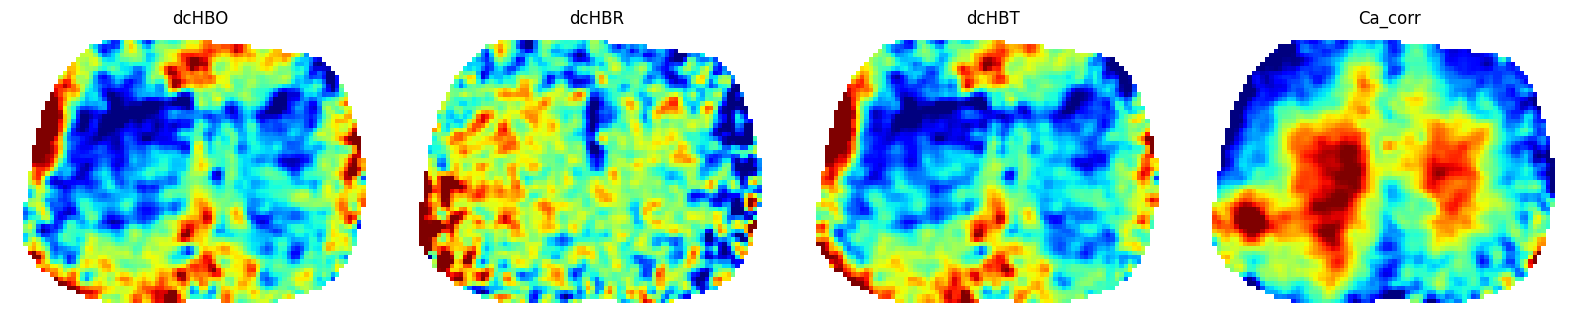

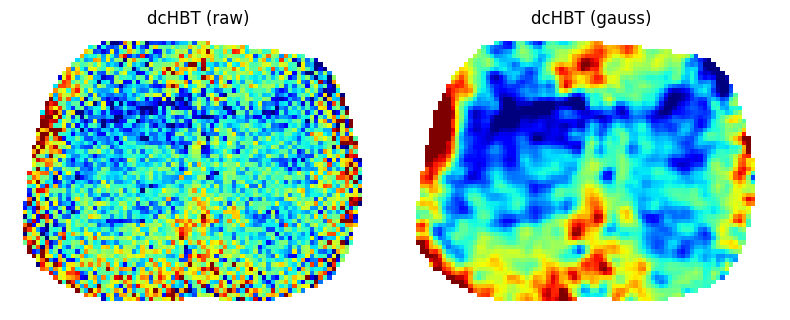

[DEBUG] Conversion success logged for m4433, Example
[DEBUG] Finished process for m4433 / Example
Found: exp=Example, mouse=m8j, state=Awake, protocol=RHL-90mkA
[DEBUG] Processing: m8j / Example / RHL-90mkA / Awake
[PROCESSING] Alignment: m8j, Example, RHL-90mkA, Awake


fluo images [m8j]: 100%|█████████████████████████████████████████████████████████| 8800/8800 [00:01<00:00, 8373.00it/s]


(64, 87)


refl2 images [m8j]: 100%|████████████████████████████████████████████████████████| 4400/4400 [00:00<00:00, 8722.55it/s]


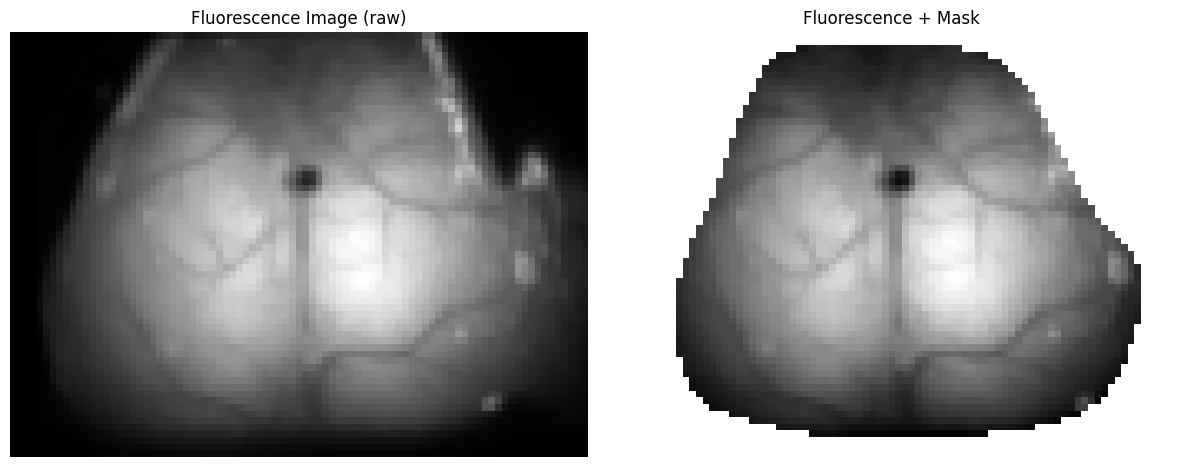

[DEBUG] Starting GCaMP conversion for m8j / Example


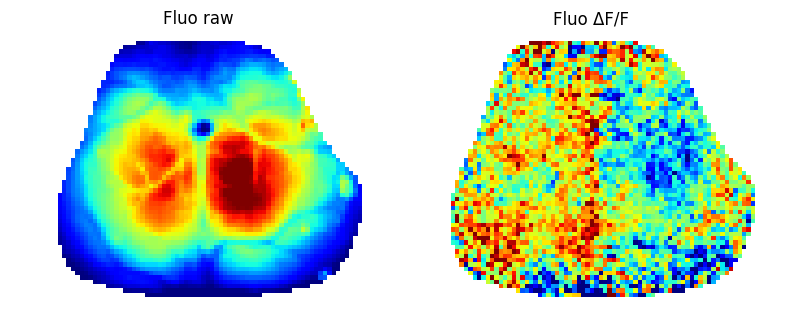

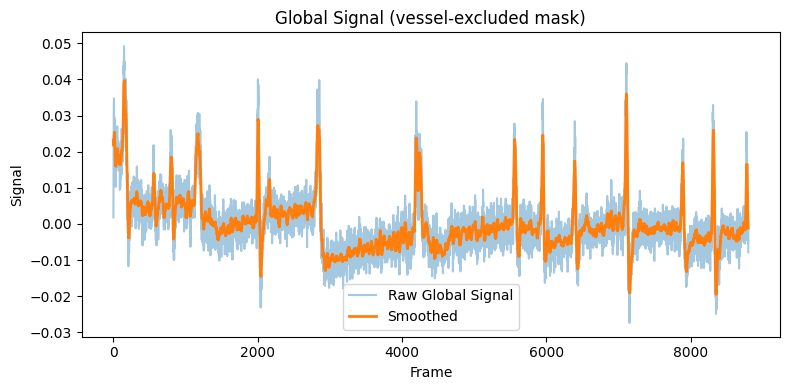

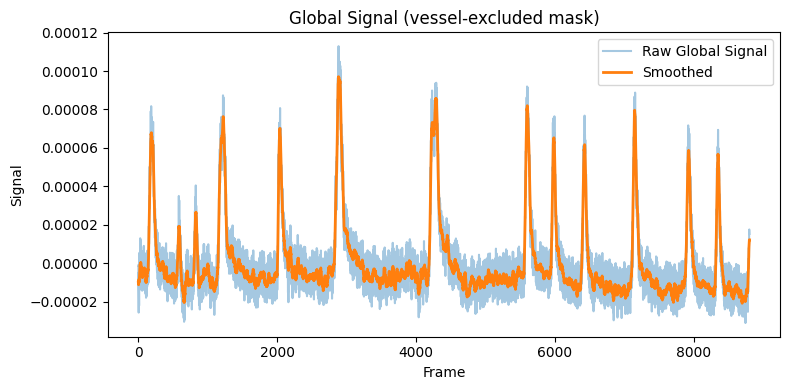

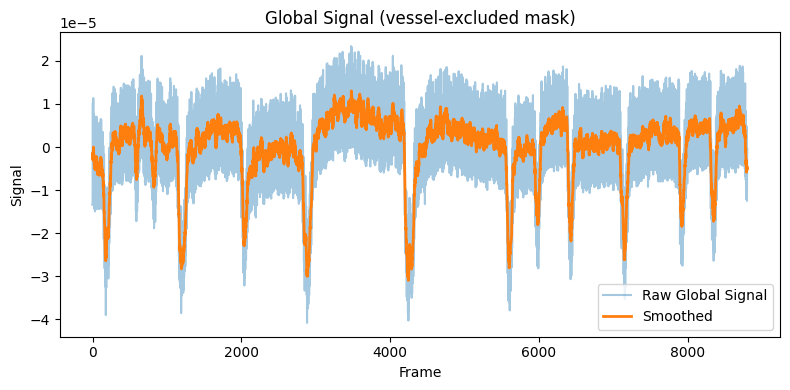

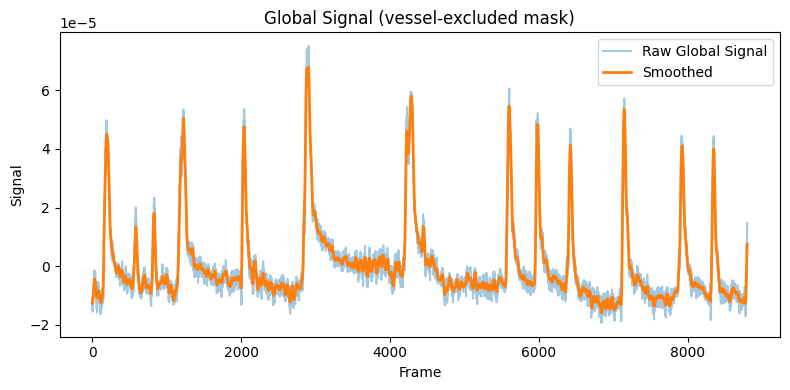

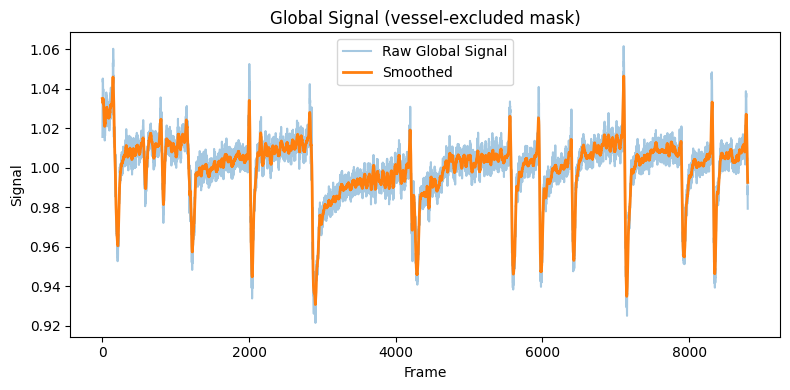

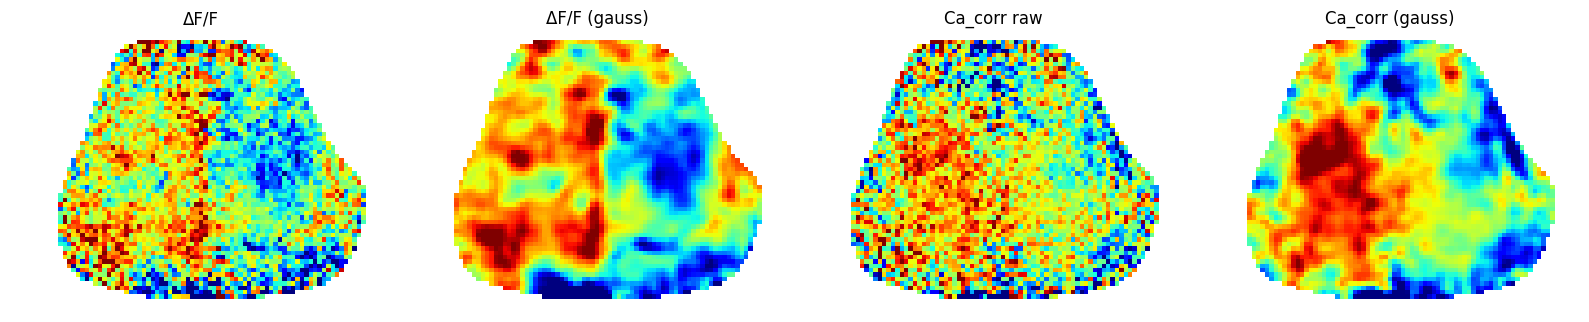

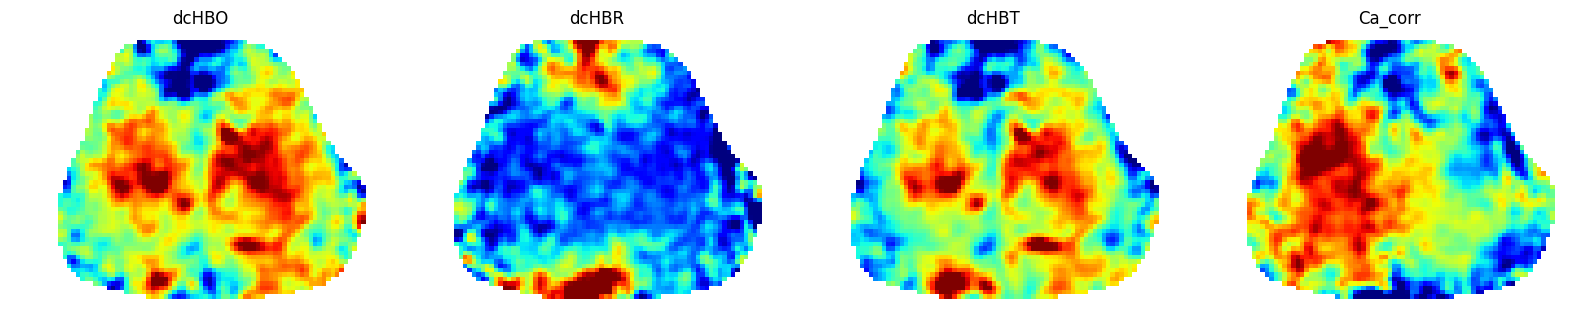

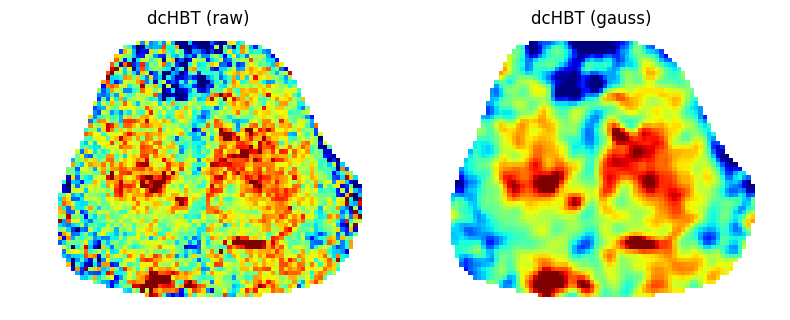

[DEBUG] Conversion success logged for m8j, Example
[DEBUG] Finished process for m8j / Example


In [3]:
res_dir, info_dir, demonstr_dir, \
result_directory_stim, result_directory_masks = setup_or_load_project(
    config_path=config_path,
    create_func=create_folders,
    def_func=def_folders
)
config = load_config(config_path)

info_moving_dir = info_dir / "info_moving.csv"
log_path = info_dir / "processed_log.csv"
log_df = load_processed_log(log_path)

for img_dir, exp, mouse, state, protocol in iterate_experiments_filt(
    config["all_exp_dir"],
    mice_to_include=config.get("mice_to_include"),
    protocols_to_include=config.get("protocols_to_include"),
    state_to_include=config.get("state_to_include"),
    exp_to_include=config.get("exp_to_include")
):
    log_df = process_mouse_experiment(
        img_dir, exp, mouse, state, protocol, config,
        res_dir, demonstr_dir, info_dir, info_moving_dir,
        log_df, log_path
    )